In [1]:
# Learning bmi
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import shutil
%matplotlib inline
print (tf.__version__)
tf.logging.set_verbosity(tf.logging.DEBUG)

1.6.0


In [2]:
shutil.rmtree('bmi_trained', ignore_errors=True) # start fresh each time

In [3]:
# Create the training data
inputs = np.zeros((1000, 1), dtype=np.float32)
targets = np.zeros((1000, 1), dtype=np.float32)
for i in range(1000):
    inputs[i] = 1.0 + 0.001 * i
    targets[i] = 80 / inputs[i] ** 2

In [4]:
# define input feature columns
feature_columns = [tf.contrib.layers.real_valued_column('height') ]

In [5]:
# instantiate DNN model
estimator = tf.contrib.learn.DNNRegressor( feature_columns=feature_columns, 
                                          hidden_units=[32,16,8],
                                          optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
                                          model_dir='bmi_trained')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_save_summary_steps': 100, '_task_type': None, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 0, '_save_checkpoints_steps': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_log_step_count_steps': 100, '_model_dir': 'bmi_trained', '_tf_random_seed': None, '_is_chief': True, '_session_config': None, '_environment': 'local', '_task_id': 0, '_keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7cd370fc50>, '_evaluation_master': '', '_num_ps_replicas': 0}


In [6]:
def input_fn_train():
    feature_data = {'height': tf.constant(inputs)}
    label_data = tf.constant(targets)
    return feature_data, label_data

In [7]:
estimator.fit(input_fn=input_fn_train, steps=1000)

DEBUG:tensorflow:Setting feature info to {'height': TensorSignature(dtype=tf.float32, shape=TensorShape([Dimension(1000), Dimension(1)]), is_sparse=False)}.
DEBUG:tensorflow:Setting labels info to TensorSignature(dtype=tf.float32, shape=TensorShape([Dimension(1000), Dimension(1)]), is_sparse=False)
DEBUG:tensorflow:Transforming feature_column _RealValuedColumn(column_name='height', dimension=1, default_value=None, dtype=tf.float32, normalizer=None)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into bmi_trained/model.ckpt.
INFO:tensorflow:step = 1, loss = 1864.4337
INFO:tensorflow:global_step/sec: 817.294
INFO:tensorflow:step = 101, loss = 389.74918 (0.123 sec)
INFO:tensorflow:global_step/sec: 973.116
INFO:tensorflow:step = 201, loss = 165.02612 (0.103 sec)
INFO:tensorflow:global_step/sec: 929.076
INFO:tensorflow:step = 301, loss 

DNNRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x7f7cd007b6d8>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'hidden_units': [32, 16, 8], 'activation_fn': <function relu at 0x7f7ce3268488>, 'optimizer': <tensorflow.python.training.adam.AdamOptimizer object at 0x7f7cd007b668>, 'input_layer_min_slice_size': None, 'feature_columns': (_RealValuedColumn(column_name='height', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),)})

In [8]:
metrics = estimator.evaluate(input_fn=input_fn_train, steps=1)
metrics['loss']

DEBUG:tensorflow:Given features: {'height': <tf.Tensor 'Const:0' shape=(1000, 1) dtype=float32>}, required signatures: {'height': TensorSignature(dtype=tf.float32, shape=TensorShape([Dimension(1000), Dimension(1)]), is_sparse=False)}.
DEBUG:tensorflow:Given labels: Tensor("Const_1:0", shape=(1000, 1), dtype=float32), required signatures: TensorSignature(dtype=tf.float32, shape=TensorShape([Dimension(1000), Dimension(1)]), is_sparse=False).
DEBUG:tensorflow:Transforming feature_column _RealValuedColumn(column_name='height', dimension=1, default_value=None, dtype=tf.float32, normalizer=None)
INFO:tensorflow:Starting evaluation at 2018-03-27-09:19:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from bmi_trained/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-03-27-09:19:53
INFO:tensorflow:Saving dict for global step 1000: global_step 

0.017130101

In [9]:
def input_fn_predict():
    feature_data = {'height': tf.constant(inputs)}
    return feature_data

In [10]:
#list(estimator.predict(input_fn=input_fn_predict))

Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
DEBUG:tensorflow:Transforming feature_column _RealValuedColumn(column_name='height', dimension=1, default_value=None, dtype=tf.float32, normalizer=None)
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from bmi_trained/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


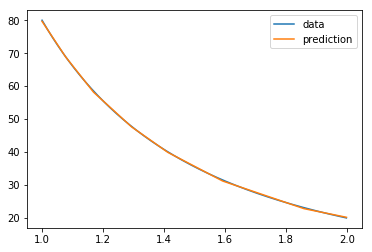

In [11]:
plt.plot(inputs, targets, label='data')
plt.plot(inputs, list(estimator.predict(input_fn=input_fn_predict)), label='prediction')
plt.legend()
plt.show()